# Importing data from part-1

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r"/content/train_part_1.csv",error_bad_lines=False)
df = df.drop(df.columns[0], axis=1)
# Do note that error_bad_lines=False will cause the offending lines to be skipped.

df.shape

b'Skipping line 12145: expected 6 fields, saw 64\nSkipping line 12378: expected 6 fields, saw 7\nSkipping line 19710: expected 6 fields, saw 27\n'


(28192, 5)

In [2]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1.0
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0.0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1.0
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1.0
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1.0


In [3]:
df.isnull().sum()

id        1
title     1
author    2
text      2
label     3
dtype: int64

In [4]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.shape

(28189, 6)

# **Data Preprocessing** 

#### **Text Preprocessing**

- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

In [5]:
#!pip install Distance

In [6]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Illustration**

* The text pre-processing steps followed here are:
1. Perform lowercase operation
2. Punctuation Removal
3. Tokenization
4. Stemming
5. Stop-words removal
6. Join the words to create sentences
7. Get the Corpus!


In [7]:
doc1 = df['title'][0]
doc1

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [8]:
# Here 'House' and 'house' are the same words and should be treated same after converting into numbers
# hence converting them to lower case

doc1 = doc1.lower()
doc1

'house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it'

Consider ‘What is data science?’ sentence for illustration:
* Token: You get a token by splitting a sentence by a space.
* Ex.: ‘What’, ‘is’, ‘data’, ‘science?’ are the 4 tokens.
* Stop-Words: stop words as per NLTK.
* Ex.: here ‘is’ is the stop word.
* Word: A token that is not a stop_word.
* Ex.: ‘What’, ‘data’, ‘science?’ are the words.

In [9]:
# removing special characters and punctuations

punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''

for ele in doc1: 
    if ele in punc: 
        doc1 = doc1.replace(ele, " ") 
doc1    

'house dem aide  we didn’t even see comey’s letter until jason chaffetz tweeted it'

In [10]:
# Splitting tokens on the basis of space
tokens1 = doc1.split(' ')

# first 10 tokens are
tokens1[:10]

['house',
 'dem',
 'aide',
 '',
 'we',
 'didn’t',
 'even',
 'see',
 'comey’s',
 'letter']

In [11]:
# we need to perform stemming and stopwords on the above tokens

# first 10 words after performing stemming and stopwords removal

words1 = [PorterStemmer().stem(token) for token in tokens1 if token not in set(stopwords.words('english'))]
words1[:10]

['hous',
 'dem',
 'aid',
 '',
 'didn’t',
 'even',
 'see',
 'comey’',
 'letter',
 'jason']

In [12]:
doc1 = ' '.join(words1)
doc1

'hous dem aid  didn’t even see comey’ letter jason chaffetz tweet'

In [13]:
#clubbing everything together

documents = pd.DataFrame(df['title'][:2])

def punc_remove(doc):
  punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
  for ele in doc: 
    if ele in punc: 
        doc = doc.replace(ele, " ") 
  return doc      


corpus=[]
sentences=[]
for i in range(0,len(documents)):
    review = re.sub('[^a-zA-Z]',' ', documents['title'][i])
    review = review.lower()
    review = punc_remove(review)
    tokens = review.split()
    words = [PorterStemmer().stem(token) for token in tokens if token not in set(stopwords.words('english'))]
    sentences =' '.join(words)
    corpus.append(sentences)

print(corpus)

['hous dem aid even see comey letter jason chaffetz tweet', 'flynn hillari clinton big woman campu breitbart']


### Performing Pre-processing of the data

In [14]:
# To get the results in 4 decimal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")
from tqdm import tqdm

def preprocess(documents):
    corpus=[]
    sentences=[]
    for i in tqdm(range(0,len(documents))):
      news = re.sub('[^a-zA-Z]',' ',documents['title'][i])
      news = news.lower()
      #news = news.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
      #                        .replace("won't", "will not").replace("cannot", "can not")\
      #                        .replace("can't", "can not")\
      #                        .replace("n't", " not").replace("what's", "what is")\
      #                        .replace("it's", "it is")\
      #                        .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
      #                        .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
      #                        .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
      #                        .replace("€", " euro ").replace("'ll", " will")
      #news = re.sub(r"([0-9]+)000000", r"\1m", news)
      #news = re.sub(r"([0-9]+)000", r"\1k", news)
      #news = punc_remove(news)
      tokens = news.split(' ')
      words = [PorterStemmer().stem(token) for token in tokens if token not in set(stopwords.words('english'))]
      sentences =' '.join(words)
      corpus.append(sentences)
    return corpus

print(preprocess(df.iloc[:1]))
corpus = preprocess(df)    


  0%|          | 27/28189 [00:00<01:45, 267.70it/s]

['hous dem aid  even see comey letter jason chaffetz tweet']


100%|██████████| 28189/28189 [01:13<00:00, 384.96it/s]


In [15]:
len(corpus)

28189

# Feature Extraction with Bag of Words (BoW)

In [16]:
# Applying Countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

## max_features=5000, it means I just need top 5000 features 
#example ABC News is basically 2 words,so in ngram,i have Given (1,3),so it will take the combination of 1 word,then 2 words 
#then 3 words

cv = CountVectorizer(max_features=5000,ngram_range=(1,3))

X = cv.fit_transform(corpus).toarray()
print(X.shape)

(28189, 5000)


In [17]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### Which are the top 7 features?

In [18]:
print(cv.get_feature_names()[0:7])

['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl']


# Feature Extraction with TF-IDF

## Applying TFIDFvectorizer

In [19]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# corpus = preprocess(df)
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(corpus)
# print(X.shape)


# Function to plot confusion matrix

In [20]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divide each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    
    #divide each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# Train-Test Split

In [21]:
df.shape

(28189, 6)

In [22]:
y_true = df['label']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y_true,test_size=0.25, random_state=42)

In [24]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in validation data :",X_test.shape)

Number of data points in train data : (21141, 5000)
Number of data points in validation data : (7048, 5000)


In [25]:
from collections import Counter

print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",round(int(train_distr[0])*100/train_len,2),"Class 1: ", round(int(train_distr[1])*100/train_len,2))

print("-"*10, "Distribution of output variable in validation data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",round(int(test_distr[0])*100/test_len,2), "Class 1: ",round(int(test_distr[1])*100/test_len,2))

---------- Distribution of output variable in train data ----------
Class 0:  56.13 Class 1:  43.87
---------- Distribution of output variable in validation data ----------
Class 0:  57.95 Class 1:  42.05


# Random Baseline Model

In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Accuracy on Validation Data using Random Model 0.5


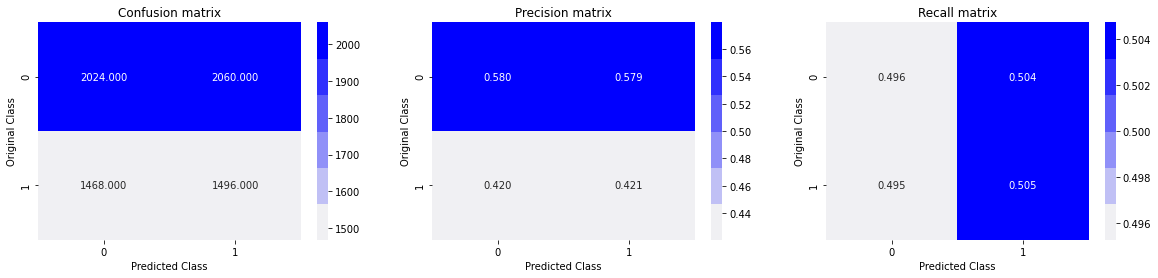

In [27]:
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])

predicted_y =np.argmax(predicted_y, axis=1)

print("Accuracy on Validation Data using Random Model",round(accuracy_score(y_test, predicted_y),2))

plot_confusion_matrix(y_test, predicted_y)


# Multinomial Naive Bayes Model

Accuracy on Train Data using NB Model 0.92
Accuracy on Validation Data using NB Model 0.9


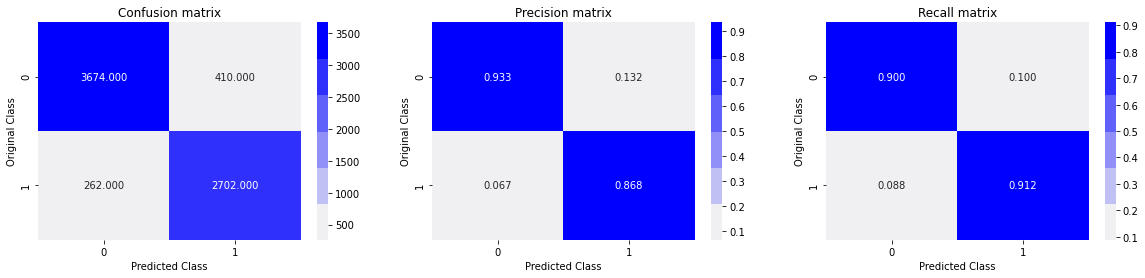

In [28]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

classifier.fit(X_train,y_train)

predicted_y_train = classifier.predict_proba(X_train)
predicted_y_train = np.argmax(predicted_y_train,axis=1)
print("Accuracy on Train Data using NB Model",round(metrics.accuracy_score(y_train, predicted_y_train),2))

predict_y = classifier.predict_proba(X_test)
predicted_y =np.argmax(predict_y,axis=1)

#print("Total number of validation data points :", len(predicted_y))
print("Accuracy on Validation Data using NB Model",round(metrics.accuracy_score(y_test,predicted_y),2))
plot_confusion_matrix(y_test, predicted_y)

# Passive Aggressive Classification Model

In [29]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [30]:
linear_clf=PassiveAggressiveClassifier()
# Fitting model 
linear_clf.fit(X_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

Accuracy on Train Data using PassiveAgressive Model 1.0
Total number of validation data points : 7048
Accuracy on Validation Data using PassiveAgressive Model 0.96


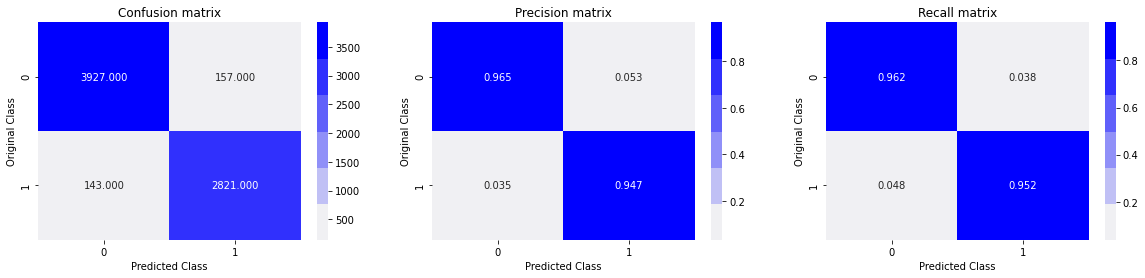

In [31]:
predictions=linear_clf.predict(X_test)

predicted_y_train = linear_clf.predict(X_train)
print("Accuracy on Train Data using PassiveAgressive Model",round(metrics.accuracy_score(y_train, predicted_y_train),2))

pred = linear_clf.predict(X_test)

print("Total number of validation data points :", len(predicted_y))
print("Accuracy on Validation Data using PassiveAgressive Model",round(metrics.accuracy_score(y_test,pred),2))
plot_confusion_matrix(y_test, pred)

In [32]:
metrics.accuracy_score(y_test,pred)

0.9574347332576617

# End!